In this Portfolio task, we will be using the dataset which consists of classification of mobiles (features). The dataset consists of the columns given below:


#### Description of Fields

* __Model__ - model number of the mobile  phone 
* __battery_power__ - battery strength of the mobile phone
* __blue__ - bluetooth of the mobile phone 
* __clock_speed__ - clock speed of the phone 
* __dual_sim__ - number of sim a mobile phone can hold
* __four_g__ - network of the mobile phone 
* __int_memory__ - internal memorary of the mobile phone 
* __mobile_wt__ - width of the mobile phone  
* __px_height__ - height of the mobile phone 
* __px_width__ - width of the mobile phone 
* __ram__ - memorary of the mobile phone 
* __talk_time__ -talk time of the mobile phone services  
* __three_g__ - network of the mobile phone 
* __touch_screen__ -touch screen of the mobile phone
* __wifi__ - wifi network of the mobile phone 

From the dataset obtained, the goal is to train the linear regression and polynomial regression models to see the different characterstics of the mobile phones. This involves a standard Data Science workflow which is exploring data, building models, making predictions and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. 

The core requirements of the portfolio 4 are:
1. Propose well-defined questions or purposes to the analysis.
2. It should involve some data preparation and exploration.
3. Make use of at least one or more analysis/prediction techniques learned from the unit since week 7.
4. Develop some kind of visualisation of the data or results.

## Requirements in the portfolio

The Dataset is taken from Kaggle
A. Display of the data from the dataset
1. Display the shape, datatypes and columns of the dataset.
2. Plot the histogram matrix of all the features in the dataset.
3. Find the sum of the null values and if there are any null values then clean it.
4. Obtain the descriptive statistics.


B. Use of linear regression and polynomial regression model for predictive analysis
1. Use Linear regression taking IMDB Rating column as dependent variable and perform regression.
2. Use Polynomial regression for further improvement of the model.

C. Data visualization for data exploration, data analysis
1. Displaying the obtained results using bar graph.
2. From the obtained graph provide analysis of which model dataset is well defined.


In [ ]:
#importing the required files for the portfolio 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#reading the file and finding if null values are there in the data set
ds = 'test.csv'
df = pd.read_csv(ds)
display(df

In [2079]:
df = df.rename(columns = {"id":"Model"})
display(df)

,Model,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [2080]:
#removing null values and displaying the information of the dataset
df_new = df.dropna()
display(df_new)
print(df_new.isnull().sum())

,Model,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


Model            0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [2081]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

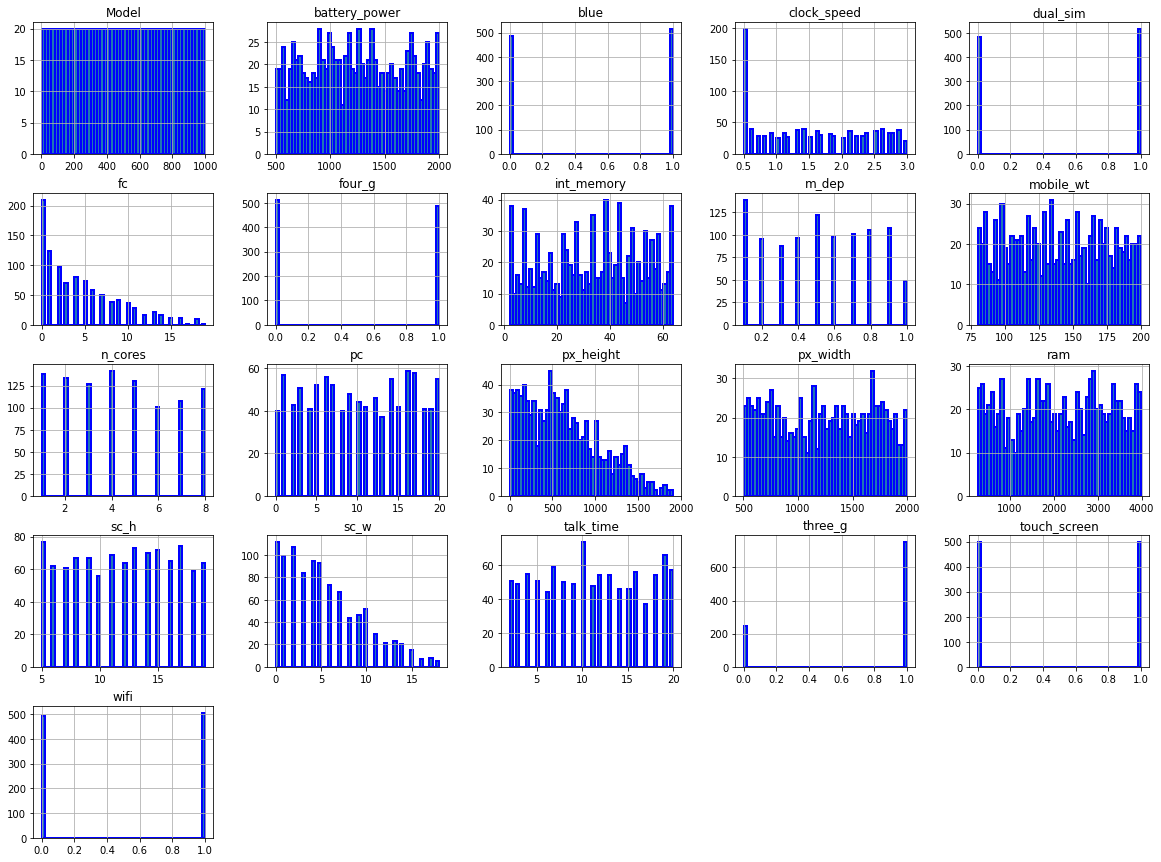

In [2082]:
# Obtaining the histogram of dataset
df_new.hist(bins=50, figsize=(20,15), edgecolor='blue', linewidth=2)
plt.show()

In [2083]:
print('Correlation between Battery Power and Talk Time:',df_new['battery_power'].corr(df_new['talk_time']))
print('Correlation between Battery Power and Internal Memory:',df_new['battery_power'].corr(df_new['int_memory']))
print('Correlation between Battery Power and Pixel Width :',df_new['battery_power'].corr(df_new['px_width']))
print('Correlation between Battery Power and Pixel Height :',df_new['battery_power'].corr(df_new['px_height']))

Correlation between Battery Power and Talk Time: 0.015546012441842425
Correlation between Battery Power and Internal Memory: 0.0037509249063805363
Correlation between Battery Power and Pixel Width : 0.05336539772823282
Correlation between Battery Power and Pixel Height : 0.048646881075329794


In [2084]:
train_1,test_1 = train_test_split(df_new, test_size = 0.25, random_state = 228)
print('Shape of training data:',train_1.shape)
print('Shape of testing data:',test_1.shape)

Shape of training data: (750, 21)
Shape of testing data: (250, 21)


In [2085]:
reg_1 = linear_model.LinearRegression()
reg_1

X_train_1 = train_1[["px_width","px_height"]]
y_train_1 = train_1["battery_power"]

X_test_1 = test_1[["px_width","px_height"]]
y_test_1 = test_1["battery_power"]

reg_1.fit(X_train_1,y_train_1)

LinearRegression()

In [2086]:
# Evaluating the performance using the train/test data in set 1 with the 2 most correlated input features
predicted_1 = reg_1.predict(X_test_1)

mse_1 = ((np.array(y_test_1)-predicted_1)**2).sum()/len(y_test_1)
r2_1 = r2_score(y_test_1, predicted_1)

print("Reg_11 MSE:", mse_1)
print("Reg_11 Root MSE:", np.sqrt(mse_1))
print("Reg_11 R Squared:", r2_1)

Reg_11 MSE: 188982.90082117115
Reg_11 Root MSE: 434.7216360168552
Reg_11 R Squared: 0.003946865449028336


In [2087]:
reg_2 = linear_model.LinearRegression()
reg_2

X_train_2 = train_1[["talk_time","int_memory"]]
y_train_2 = train_1["battery_power"]

X_test_2 = test_1[["talk_time","int_memory"]]
y_test_2 = test_1["battery_power"]

reg_2.fit(X_train_2,y_train_2)

LinearRegression()

In [2088]:
# Evaluating the performance using the train/test data in set 1 with the 2 most correlated input features
predicted_2 = reg_2.predict(X_test_2)

mse_2 = ((np.array(y_test_2)-predicted_2)**2).sum()/len(y_test_2)
r2_2 = r2_score(y_test_2, predicted_2)

print("Reg_12 MSE:", mse_2)
print("Reg_12 Root MSE:", np.sqrt(mse_2))
print("Reg_12 R Squared:", r2_2)

Reg_12 MSE: 189687.3652678402
Reg_12 Root MSE: 435.5311300789419
Reg_12 R Squared: 0.0002339156676698373


In [2089]:
X1 = df_new[["px_width","px_height"]]

In [2090]:
y1 = df_new[["battery_power"]]

In [2091]:
#Defining, splitting and printing the train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state= 83)

In [2097]:
# Applying polynomial regresssion
poly = PolynomialFeatures(degree=2, include_bias=True)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
# Include bias parameter
lr = linear_model.LinearRegression()
lr.fit(X1_train_trans, y1_train)
y1_pred = lr.predict(X1_test_trans)
mse_21 = ((np.array(y1_test)-y1_pred)**2).sum()/len(y1_test)
print("Reg_21 MSE:", mse_21)
print("Reg_21 RMSE:", np.sqrt(mse_21))
print("Reg_21 R Squared:", r2_score(y1_test, y1_pred))

Reg_21 MSE: 181002.31955350787
Reg_21 RMSE: 425.4436737730482
Reg_21 R Squared: 0.00812517128565704


In [2093]:
X2 = df_new[["talk_time","int_memory"]]

In [2094]:
y2 = df_new[["battery_power"]]

In [2095]:
#Defining, splitting and printing the train and test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state= 153)

In [2098]:
# Applying polynomial regresssion
poly = PolynomialFeatures(degree=2, include_bias=True)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
# Include bias parameter
lr = linear_model.LinearRegression()
lr.fit(X2_train_trans, y2_train)
y2_pred = lr.predict(X2_test_trans)
mse_22 = ((np.array(y2_test)-y2_pred)**2).sum()/len(y2_test)
print("Reg_22 MSE:", mse_22)
print("Reg_22 RMSE:", np.sqrt(mse_22))
print("Reg_22 R Squared:", r2_score(y2_test, y2_pred))

Reg_22 MSE: 182185.3548193937
Reg_22 RMSE: 426.8317640703345
Reg_22 R Squared: 0.00026275492475036355


## PLOTTING OF  GRAPH 

In [2114]:
#Creating a new data frame and collecting the values of mse of all models and displaying it
df_mse = pd.DataFrame({"mse":[mse_1,mse_2,mse_21,mse_22]},index = ["Reg_11","Reg_12","Reg_21","Reg_22"])
df_mse

,mse
Reg_11,188982.900821
Reg_12,189687.365268
Reg_21,181002.319554
Reg_22,182185.354819


<BarContainer object of 4 artists>

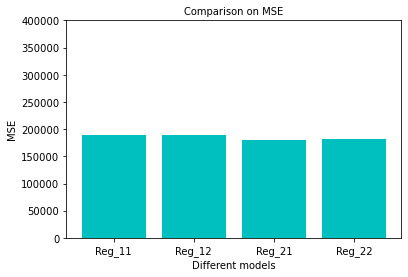

In [2102]:
# Plotting all the mse values of different models in a bar chart
plt.ylim(0,400000)
plt.xlabel("Different models" , size = 10)
plt.ylabel("MSE", size = 10)
plt.title("Comparison on MSE", size = 10)

plt.bar(data = df_mse,
        height = "mse",
        x = ["Reg_11","Reg_12","Reg_21","Reg_22"],
        color = "c")

In [2115]:
#Creating a new data frame and collecting the values of rmse of all models and displaying it
df_rmse = pd.DataFrame({"rmse":[np.sqrt(mse_1),np.sqrt(mse_2),np.sqrt(mse_21),np.sqrt(mse_22)]},index = ["Reg_11","Reg_12","Reg_21","Reg_22"])
df_rmse

,rmse
Reg_11,434.721636
Reg_12,435.531130
Reg_21,425.443674
Reg_22,426.831764


<BarContainer object of 4 artists>

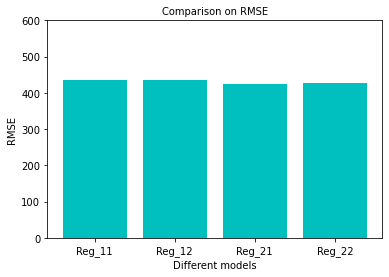

In [2106]:
# Plotting all the rmse values of different models in a bar chart
plt.ylim(0,600)
plt.xlabel("Different models" , size = 10)
plt.ylabel("RMSE", size = 10)
plt.title("Comparison on RMSE", size = 10)

plt.bar(data = df_rmse,
        height = "rmse",
        x = ["Reg_11","Reg_12","Reg_21","Reg_22"],
        color = "c")

In [2116]:
#Creating a new data frame and collecting the values of r2 of all models and displaying it
df_r2 = pd.DataFrame({"r2":[r2_1,r2_2,r2_score(y1_test, y1_pred),r2_score(y2_test, y2_pred)]},index = ["Reg_11","Reg_12","Reg_21","Reg_22"])
df_r2

,r2
Reg_11,0.003947
Reg_12,0.000234
Reg_21,0.008125
Reg_22,0.000263


<BarContainer object of 4 artists>

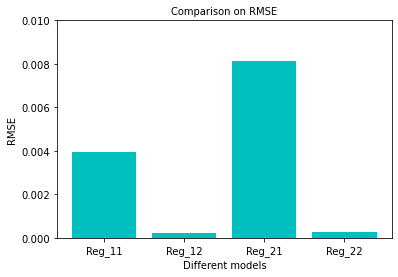

In [2113]:
# Plotting all the rsquare values of different models in a bar chart
plt.ylim(0,0.01)
plt.xlabel("Different models" , size = 10)
plt.ylabel("RMSE", size = 10)
plt.title("Comparison on RMSE", size = 10)

plt.bar(data = df_r2,
        height = "r2",
        x = ["Reg_11","Reg_12","Reg_21","Reg_22"],
        color = "c")

## Analysis of the portfolio

1. From mse graph <br>
* reg_11 > reg_21 indicates that more correlated input features help generate better models (result) <br>
* reg_12 > reg_22 indicates that more training leads to better predictions <br>

2. From rmse graph <br>
* reg_11 > reg_21 indicates that more correlated input features help generate better models (result) <br>
* reg_12 > reg_22 indicates that more training leads to better predictions <br>

3. From r square graph <br>
* reg_21 > reg_11 indicates that more correlated input features help generate better models (result) <br>
* reg_22 > reg_12 indicates that more training leads to better predictions <br>